# Exercise Nine: Numbers
This week, you'll be exploring the GSS dataset we worked within in the "Social Stats" exercise. Using our demo and the textbook as a guide, pick three new variables to explore. Your workflow should:

- Import the current version of the file (available for download at the link above), and isolate the columns of interest based on the variables you want to include
- Using the variable navigator provided by GSS, determine the years applicable and narrow your dataset accordingly.
- Visualize at least two quantiative relationships or patterns: these might include connections between clear numerical values, such as age and income, or more complex visualizations based on boolean data (for example, our "yes" and "no" to reading fiction.)
- Group the data using at least two different divisions to spot interesting trends, and plot at least one variance across a group (refer to our example of happiness among fiction readers as a starting point.)
  
For a bonus challenge, try running another analysis using an advanced method such as summary statistics or cross tabulation.

## Import GSS File and Isolate Columns of Interest

GSS File not synced on GitHub per in class instructions on Git Ignore

Variables selected:  
- Demographics:  id, year, age, sex, race, degree, realrinc, region
- howfree = How much freedom do you think Americans have today? Would you say they have complete freedom, a great deal of freedom,
a moderate degree of freedom, not much freedom, or no freedom at all?
- freenow = Do you think Americans today have more freedom, less freedom, or about the same amount of freedom as in the past?
- satdemoc = On the whole, are you very satisfied, fairly satisfied, not very satisfied, or not at all satisfied with the way democracy works in the United States?
  



In [15]:
import pandas as pd

columns = ['id', 'year', 'age', 'sex', 'race', 'degree', 'realrinc', 'region', 'howfree', 'freenow', 'satdemoc']
df = pd.read_stata("GSS7218_R1.dta", columns=columns)

## Limit to Years Applicable
## Limit to Exclude those who left age and/or realrinc blank

The data appears to be collected in years 2000-2004.  
(This would be much more interesting if it was also collected currently.)

In [16]:
df = df.loc[df['year'].isin({2000:2004})]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race          degree realrinc  \
38116     1  2000  26.0    male  white        bachelor   5985.0   
38117     2  2000  48.0  female  white     HIGH SCHOOL   5985.0   
38118     3  2000  67.0  female  white     HIGH SCHOOL      NaN   
38119     4  2000  39.0  female  white     HIGH SCHOOL      NaN   
38120     5  2000  25.0  female  white  JUNIOR COLLEGE      NaN   
...     ...   ...   ...     ...    ...             ...      ...   
40928  2813  2000  80.0    male  white     HIGH SCHOOL      NaN   
40929  2814  2000  29.0  female  white        bachelor   7481.0   
40930  2815  2000  53.0    male  white  LT HIGH SCHOOL  18287.0   
40931  2816  2000  38.0    male  white     HIGH SCHOOL  36575.0   
40932  2817  2000  61.0  female  white        graduate   4987.0   

                region                       howfree  \
38116  W. SOU. CENTRAL  A MODERATE DEGREE OF FREEDOM   
38117  W. SOU. CENTRAL       A GREAT DEAL OF FREEDOM 

In [17]:
df = df.loc[df['realrinc'].notnull()]
df = df.loc[df['age'].notnull()]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race          degree realrinc  \
38116     1  2000  26.0    male  white        bachelor   5985.0   
38117     2  2000  48.0  female  white     HIGH SCHOOL   5985.0   
38121     6  2000  25.0  female  white     HIGH SCHOOL  14131.0   
38122     7  2000  36.0    male  white     HIGH SCHOOL  18287.0   
38123     8  2000  44.0  female  white  JUNIOR COLLEGE   4987.0   
...     ...   ...   ...     ...    ...             ...      ...   
40927  2812  2000  62.0    male  white     HIGH SCHOOL  18287.0   
40929  2814  2000  29.0  female  white        bachelor   7481.0   
40930  2815  2000  53.0    male  white  LT HIGH SCHOOL  18287.0   
40931  2816  2000  38.0    male  white     HIGH SCHOOL  36575.0   
40932  2817  2000  61.0  female  white        graduate   4987.0   

                region                       howfree  \
38116  W. SOU. CENTRAL  A MODERATE DEGREE OF FREEDOM   
38117  W. SOU. CENTRAL       A GREAT DEAL OF FREEDOM 

## Using the code block to adjust income for inflation

Source for CPI = US Bureau of Labor Statistics

In [38]:
df.loc[df['year'] == 2000, 'realrinc'].astype(float).min() == 333;
round(df.loc[df['year'] == 2000, 'realrinc'].astype(float).mean(), 2) == 22110.13;
print(df.head)

cpi2021_vs_2000 = 162.51 / 100

assert df['realrinc'].astype(float).median() < 24000  
df['realrinc2021'] = cpi2021_vs_2000 * df['realrinc'].astype(float)
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race          degree realrinc  \
38116     1  2000  26.0    male  white        bachelor   5985.0   
38117     2  2000  48.0  female  white     HIGH SCHOOL   5985.0   
38121     6  2000  25.0  female  white     HIGH SCHOOL  14131.0   
38122     7  2000  36.0    male  white     HIGH SCHOOL  18287.0   
38123     8  2000  44.0  female  white  JUNIOR COLLEGE   4987.0   
...     ...   ...   ...     ...    ...             ...      ...   
40927  2812  2000  62.0    male  white     HIGH SCHOOL  18287.0   
40929  2814  2000  29.0  female  white        bachelor   7481.0   
40930  2815  2000  53.0    male  white  LT HIGH SCHOOL  18287.0   
40931  2816  2000  38.0    male  white     HIGH SCHOOL  36575.0   
40932  2817  2000  61.0  female  white        graduate   4987.0   

                region                       howfree  \
38116  W. SOU. CENTRAL  A MODERATE DEGREE OF FREEDOM   
38117  W. SOU. CENTRAL       A GREAT DEAL OF FREEDOM 

## Visualize quantitative relationships

1. region and income
2. degree and income


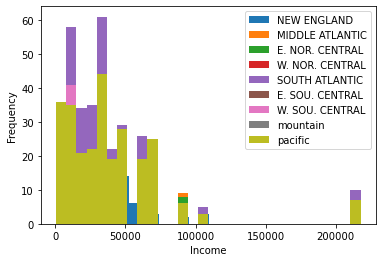

In [46]:
import matplotlib.pyplot as plt
df.groupby('region')['realrinc2021'].plot(kind='hist', bins=30)
plt.xlabel('Income')
plt.legend();

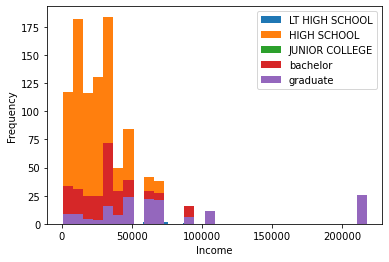

In [51]:
df.groupby('degree')['realrinc2021'].plot(kind='hist', bins=30)
plt.xlabel('Income')
plt.legend();

## Group the data for interesting trends

1. howfree and income
2. freenow and income
3. satdemoc and income


Among income groups in 2000-2204, those feeling that freedom was waning were higher income, but at the same time higher income respondents appeared to be more satisfied with the state of democracy.

In [43]:
df.groupby('howfree')['realrinc2021'].mad().round()

howfree
COMPLETE FREEDOM                20418.0
A GREAT DEAL OF FREEDOM         23147.0
A MODERATE DEGREE OF FREEDOM    21775.0
NOT MUCH FREEDOM                10383.0
NO FREEDOM AT ALL               18371.0
Name: realrinc2021, dtype: float64

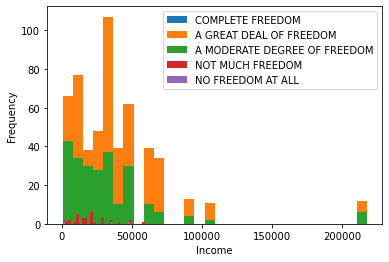

In [40]:
import matplotlib.pyplot as plt
df.groupby('howfree')['realrinc2021'].plot(kind='hist', bins=30)
plt.xlabel('Income')
plt.legend();

In [44]:
df.groupby('freenow')['realrinc2021'].mad().round()

freenow
MORE FREEDOM                        21888.0
ABOUT THE SAME AMOUNT OF FREEDOM    21278.0
LESS FREEDOM                        25308.0
Name: realrinc2021, dtype: float64

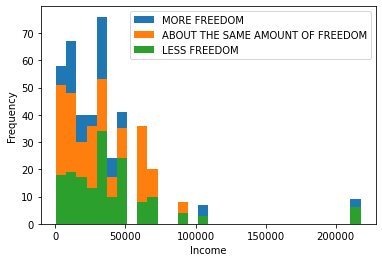

In [41]:
df.groupby('freenow')['realrinc2021'].plot(kind='hist', bins=30)
plt.xlabel('Income')
plt.legend();

In [45]:
df.groupby('satdemoc')['realrinc2021'].mad().round()

satdemoc
VERY SATISFIED          24140.0
FAIRLY SATISFIED        22730.0
NOT VERY SATISFIED      20030.0
NOT AT ALL SATISFIED    14888.0
Name: realrinc2021, dtype: float64

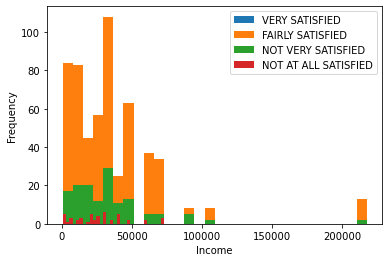

In [42]:
df.groupby('satdemoc')['realrinc2021'].plot(kind='hist', bins=30)
plt.xlabel('Income')
plt.legend();

## Bonus Challenge - Crosstab

In [56]:
df_subset = df.loc[df['howfree'].notnull(), ['region', 'howfree']]
pd.crosstab(df_subset['region'], df_subset['howfree'], margins=True)

howfree,COMPLETE FREEDOM,A GREAT DEAL OF FREEDOM,A MODERATE DEGREE OF FREEDOM,NOT MUCH FREEDOM,NO FREEDOM AT ALL,All
region,,,,,,
NEW ENGLAND,5,25,15,0,0,45
MIDDLE ATLANTIC,14,83,37,4,0,138
E. NOR. CENTRAL,9,92,42,3,1,147
W. NOR. CENTRAL,10,43,17,3,0,73
SOUTH ATLANTIC,19,98,38,11,1,167
E. SOU. CENTRAL,7,31,21,4,0,63
W. SOU. CENTRAL,8,59,24,3,0,94
mountain,5,34,19,1,1,60
pacific,13,81,27,4,0,125


In [57]:
df_subset = df.loc[df['freenow'].notnull(), ['region', 'freenow']]
pd.crosstab(df_subset['region'], df_subset['freenow'], margins=True)

freenow,MORE FREEDOM,ABOUT THE SAME AMOUNT OF FREEDOM,LESS FREEDOM,All
region,,,,
NEW ENGLAND,23,15,7,45
MIDDLE ATLANTIC,65,57,15,137
E. NOR. CENTRAL,58,56,31,145
W. NOR. CENTRAL,34,26,13,73
SOUTH ATLANTIC,71,68,28,167
E. SOU. CENTRAL,26,20,17,63
W. SOU. CENTRAL,44,31,18,93
mountain,24,19,17,60
pacific,56,49,20,125


In [55]:
df_subset = df.loc[df['satdemoc'].notnull(), ['region', 'satdemoc']]
pd.crosstab(df_subset['region'], df_subset['satdemoc'], margins=True)

satdemoc,VERY SATISFIED,FAIRLY SATISFIED,NOT VERY SATISFIED,NOT AT ALL SATISFIED,All
region,,,,,
NEW ENGLAND,8,25,10,2,45
MIDDLE ATLANTIC,20,93,19,3,135
E. NOR. CENTRAL,22,90,26,7,145
W. NOR. CENTRAL,13,43,14,1,71
SOUTH ATLANTIC,32,103,21,9,165
E. SOU. CENTRAL,6,41,8,8,63
W. SOU. CENTRAL,18,57,10,7,92
mountain,6,35,13,5,59
pacific,23,78,20,4,125
